In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')

In [5]:
if 'Postal Code' in df.columns:
    df.drop('Postal Code', axis=1, inplace=True)  # Drop the column if it exists
    print("'Postal Code' column was dropped successfully")

'Postal Code' column was dropped successfully


In [6]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['days_to_ship'] = (df['Ship Date'] - df['Order Date']).dt.days
cols = ['Order Date', 'days_to_ship'] + [col for col in df.columns if col not in ['Order Date', 'days_to_ship']]
df = df[cols]

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['days_to_ship'] = (df['Ship Date'] - df['Order Date']).dt.days
cols = ['Row ID', 'Order ID', 'Order Date', 'days_to_ship'] + [col for col in df.columns if col not in ['Row ID', 'Order ID', 'Order Date', 'days_to_ship']]
df = df[cols]
df

,Row ID,Order ID,Order Date,days_to_ship,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,3,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,3,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,4,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,7,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,7,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,7,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,5,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,5,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,5,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [9]:
df['days_to_ship'].max()
df[df['days_to_ship'] == 7]

,Row ID,Order ID,Order Date,days_to_ship,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
3,4,US-2016-108966,2016-10-11,7,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,7,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
16,17,CA-2015-105893,2015-11-11,7,2015-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800
86,87,CA-2018-155558,2018-10-26,7,2018-11-02,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,Rochester,Minnesota,Central,TEC-AC-10001998,Technology,Accessories,Logitech LS21 Speaker System - PC Multimedia -...,19.9900
87,88,CA-2018-155558,2018-10-26,7,2018-11-02,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,Rochester,Minnesota,Central,OFF-LA-10000134,Office Supplies,Labels,Avery 511,6.1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,9689,US-2018-135986,2018-06-20,7,2018-06-27,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,Richmond,Virginia,South,OFF-PA-10001534,Office Supplies,Paper,Xerox 230,32.4000
9689,9690,US-2018-135986,2018-06-20,7,2018-06-27,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,Richmond,Virginia,South,TEC-PH-10003691,Technology,Phones,BlackBerry Q10,503.9600
9768,9769,CA-2018-142328,2018-12-07,7,2018-12-14,Standard Class,TC-21535,Tracy Collins,Home Office,United States,San Francisco,California,West,OFF-PA-10000380,Office Supplies,Paper,"REDIFORM Incoming/Outgoing Call Register, 11"" ...",50.0400
9773,9774,CA-2017-160234,2017-06-26,7,2017-07-03,Standard Class,PF-19225,Phillip Flathmann,Consumer,United States,Atlanta,Georgia,South,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,135.9500


In [10]:
df[df['days_to_ship'] == 7][['City', 'State']]

,City,State
3,Fort Lauderdale,Florida
4,Fort Lauderdale,Florida
16,Madison,Wisconsin
86,Rochester,Minnesota
87,Rochester,Minnesota
...,...,...
9688,Richmond,Virginia
9689,Richmond,Virginia
9768,San Francisco,California
9773,Atlanta,Georgia


In [11]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   days_to_ship   9800 non-null   int64         
 4   Ship Date      9800 non-null   datetime64[ns]
 5   Ship Mode      9800 non-null   object        
 6   Customer ID    9800 non-null   object        
 7   Customer Name  9800 non-null   object        
 8   Segment        9800 non-null   object        
 9   Country        9800 non-null   object        
 10  City           9800 non-null   object        
 11  State          9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [13]:
df.describe(include = 'all')

,Row ID,Order ID,Order Date,days_to_ship,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,NaN,NaN,NaN,4,793,793,3,1,529,49,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,NaN,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,NaN,NaN,NaN,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,2017-05-01 05:13:51.673469440,3.961122,2017-05-05 04:17:52.653061120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.769059
min,1.000000,NaN,2015-01-03 00:00:00,0.000000,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,2016-05-24 00:00:00,3.000000,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,2017-06-26 00:00:00,4.000000,2017-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,2018-05-15 00:00:00,5.000000,2018-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.605000
max,9800.000000,NaN,2018-12-30 00:00:00,7.000000,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22638.480000


In [14]:
bottom_10_products = df.sort_values(by='Sales', ascending=True).head(10)

# Display the data for the bottom 10 products
print("Bottom 10 Products with Least Sales:")
print(bottom_10_products)

Bottom 10 Products with Least Sales:
      Row ID        Order ID Order Date  days_to_ship  Ship Date  \
4101    4102  US-2018-102288 2018-06-19             4 2018-06-23   
9292    9293  CA-2018-124114 2018-03-02             0 2018-03-02   
8658    8659  CA-2017-168361 2017-06-21             4 2017-06-25   
4711    4712  CA-2015-112403 2015-03-31             0 2015-03-31   
2106    2107  US-2015-152723 2015-09-26             0 2015-09-26   
7548    7549  CA-2015-103492 2015-10-10             5 2015-10-15   
8033    8034  CA-2016-119690 2016-06-25             3 2016-06-28   
2761    2762  CA-2018-126536 2018-10-12             2 2018-10-14   
8024    8025  CA-2015-129189 2015-07-21             4 2015-07-25   
4933    4934  CA-2016-106978 2016-09-28             6 2016-10-04   

           Ship Mode Customer ID     Customer Name      Segment  \
4101  Standard Class    ZC-21910  Zuschuss Carroll     Consumer   
9292        Same Day    RS-19765    Roland Schwarz    Corporate   
8658  Standar

This is the Bottom 10 Products

In [15]:
df[df['Sales'] < 1].count()

,0
Row ID,8
Order ID,8
Order Date,8
days_to_ship,8
Ship Date,8
Ship Mode,8
Customer ID,8
Customer Name,8
Segment,8
Country,8


Most of the bottom sales is for **Blinders**

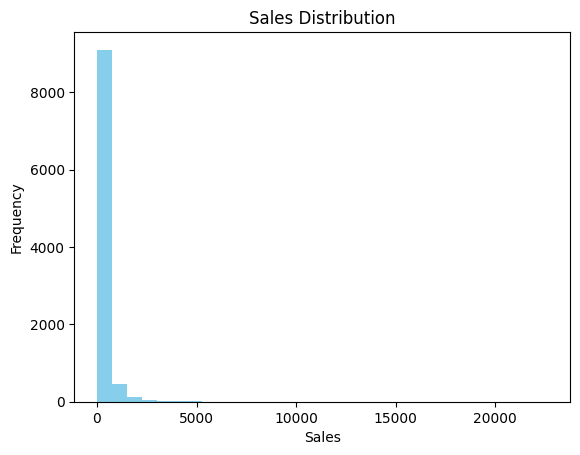

In [16]:
# Histogram for Sales
df['Sales'].plot(kind='hist', bins=30, title="Sales Distribution", color='skyblue')
plt.xlabel("Sales")
plt.show()

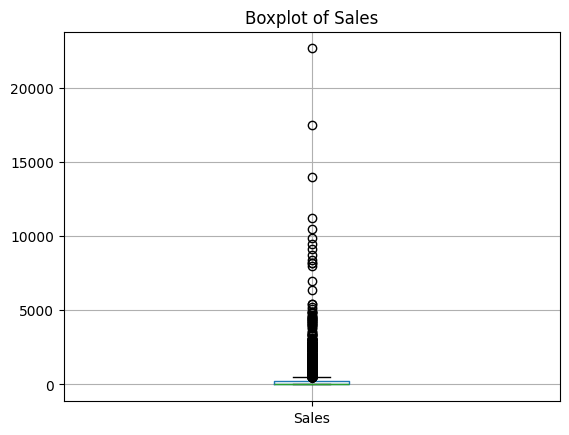

In [17]:
# Boxplot for Sales
df.boxplot(column='Sales')
plt.title("Boxplot of Sales")
plt.show()

This boxplot shows the their are outliers

In [18]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print(outliers)

      Row ID        Order ID Order Date  days_to_ship  Ship Date  \
1          2  CA-2017-152156 2017-11-08             3 2017-11-11   
3          4  US-2016-108966 2016-10-11             7 2016-10-18   
7          8  CA-2015-115812 2015-06-09             5 2015-06-14   
10        11  CA-2015-115812 2015-06-09             5 2015-06-14   
11        12  CA-2015-115812 2015-06-09             5 2015-06-14   
...      ...             ...        ...           ...        ...   
9759    9760  CA-2017-146913 2017-10-31             5 2017-11-05   
9774    9775  CA-2015-169019 2015-07-26             4 2015-07-30   
9781    9782  CA-2017-153178 2017-09-14             4 2017-09-18   
9787    9788  CA-2018-144491 2018-03-27             5 2018-04-01   
9788    9789  CA-2018-144491 2018-03-27             5 2018-04-01   

           Ship Mode Customer ID    Customer Name    Segment        Country  \
1       Second Class    CG-12520      Claire Gute   Consumer  United States   
3     Standard Class    S

In [19]:
df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

In [20]:
df['Sales'].describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [21]:
Q1=df['Sales'].quantile(0.25)
Q3= df['Sales'].quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers= df[(df['Sales']< lower_bound)| df['Sales']>upper_bound]
num_outliers= len(outliers)
print(num_outliers)

0


In [22]:
top_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
print("Top 10 products by sales:")
print(top_products.head(10))

Top 10 products by sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


This is the top 10 Products

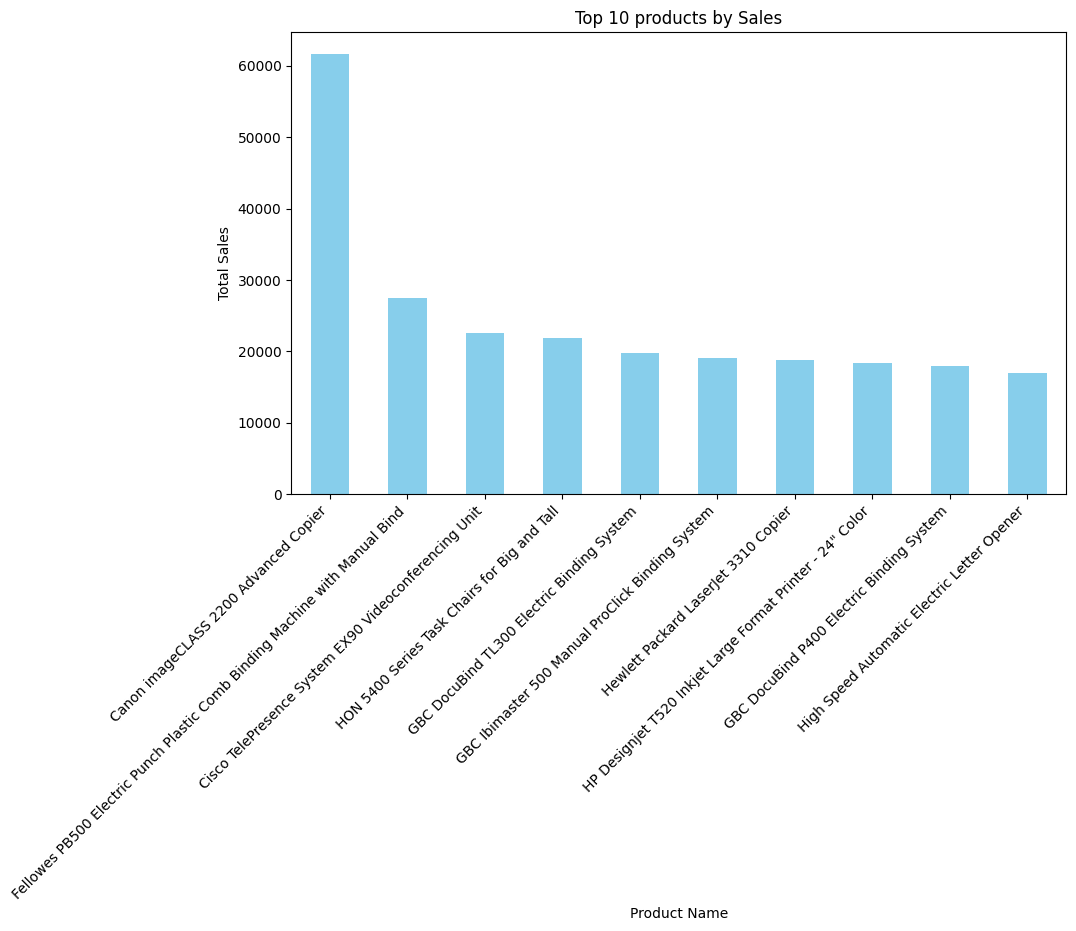

In [23]:
top_products.head(10).plot(kind='bar',figsize=(10,6),color='skyblue')
plt.title('Top 10 products by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.show()

This is the graph explain the **Total sales of the top 10 products **

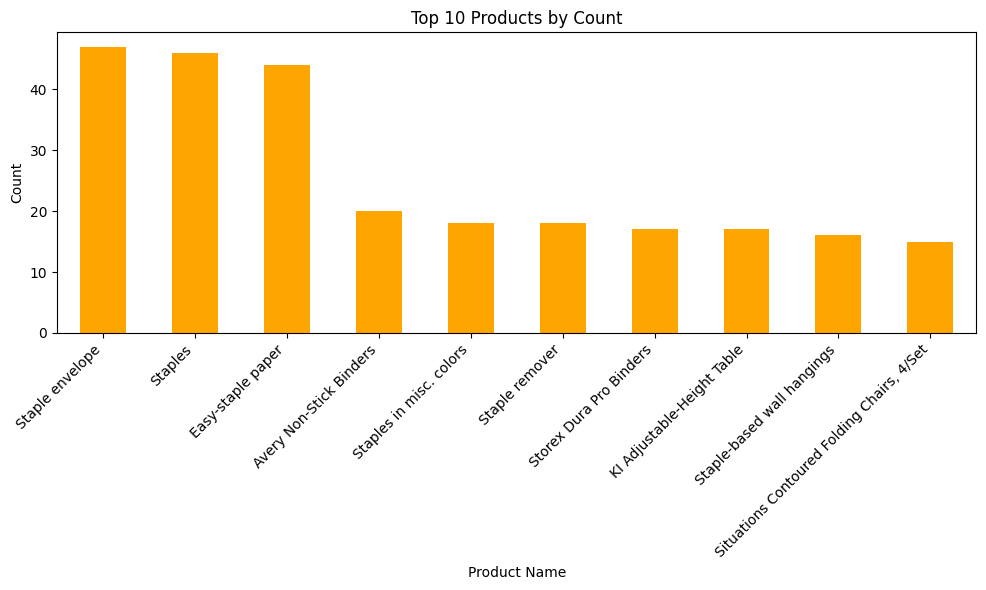

In [24]:
top_products_count = df['Product Name'].value_counts().nlargest(10).reset_index()
top_products_count.columns = ['Product Name', 'Count']

top_products_count.plot(
    x='Product Name', y='Count', kind='bar', figsize=(10, 6), color='orange', legend=False
)
plt.title('Top 10 Products by Count')
plt.ylabel('Count')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This graph the top 10 products with respect to No. of sales happened

In [25]:
print(df['Ship Mode'].value_counts())

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


This shows the ship modes and value of count of each ship mode

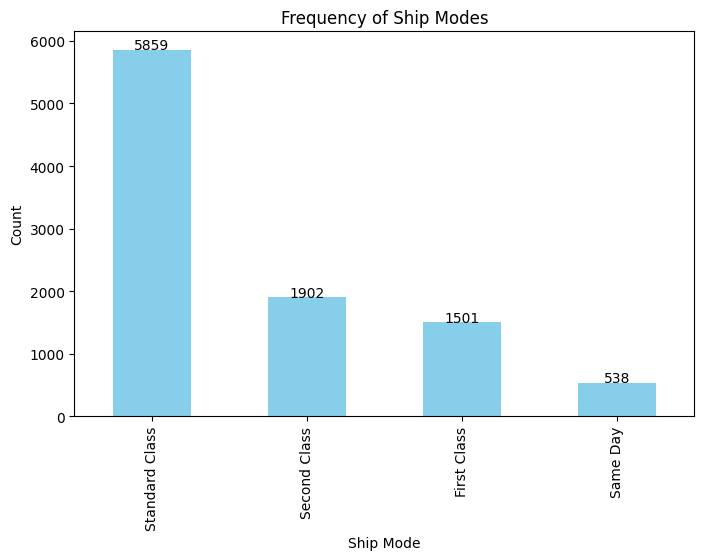

In [26]:
ship_mode_counts = df['Ship Mode'].value_counts()
ax = ship_mode_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))

for index, value in enumerate(ship_mode_counts):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

plt.title("Frequency of Ship Modes")
plt.xlabel("Ship Mode")
plt.ylabel("Count")
plt.show()

This is the graph that shows the ship mode and the count of each ship mode

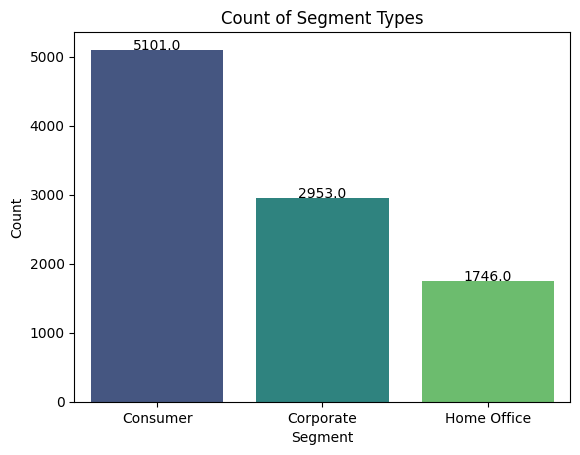

In [27]:
ax = sns.countplot(x='Segment', data=df, palette='viridis')

for bar in ax.patches:
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2
    plt.text(bar_x, bar_height + 2, str(bar_height), ha='center', fontsize=10)

plt.title("Count of Segment Types")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

This is the graph demonstrating different segments with repect to how many products are thier in each segments

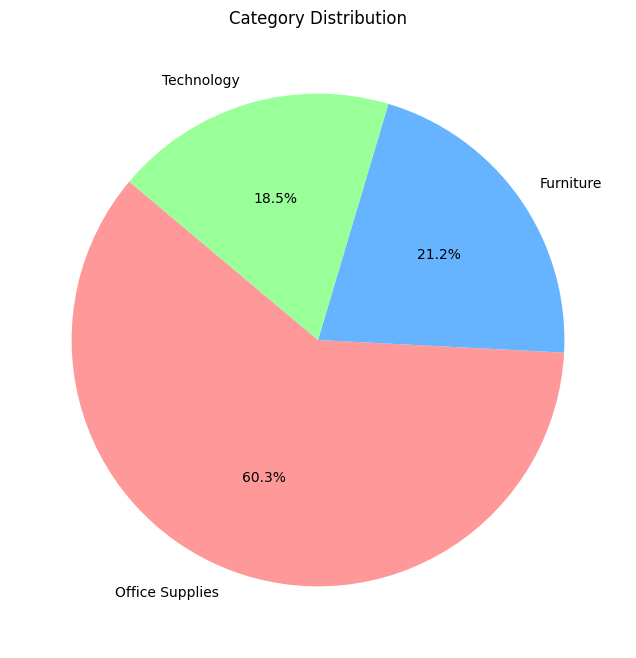

In [28]:
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Category Distribution")
plt.ylabel("")
plt.show()


This is the pie chart demonstrating the catagories

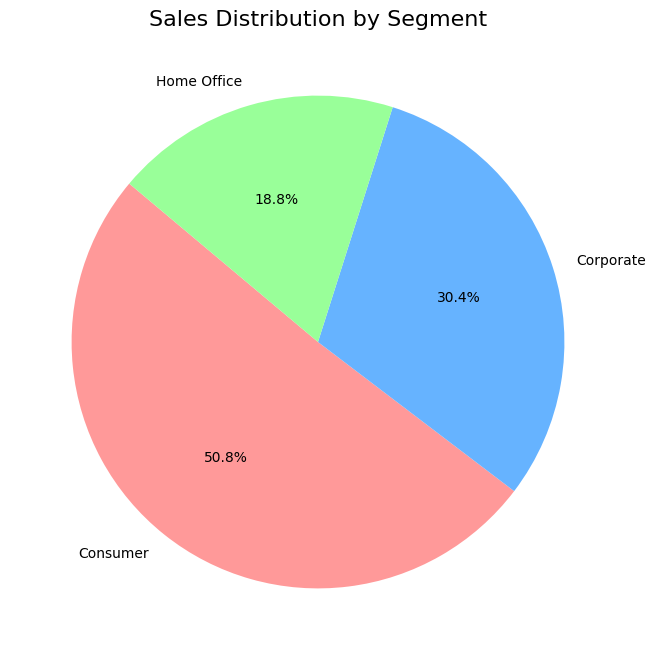

In [29]:
segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Sales Distribution by Segment", fontsize=16)
plt.show()

This is pie chart explain the sales of products that happened in each of the segments

In [30]:
df = df.copy()
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum()
print(monthly_sales)

Month-Year
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040


This shows the every month between 1 jan 2015 to 1 dec 2018 and each of the month how much sales happened

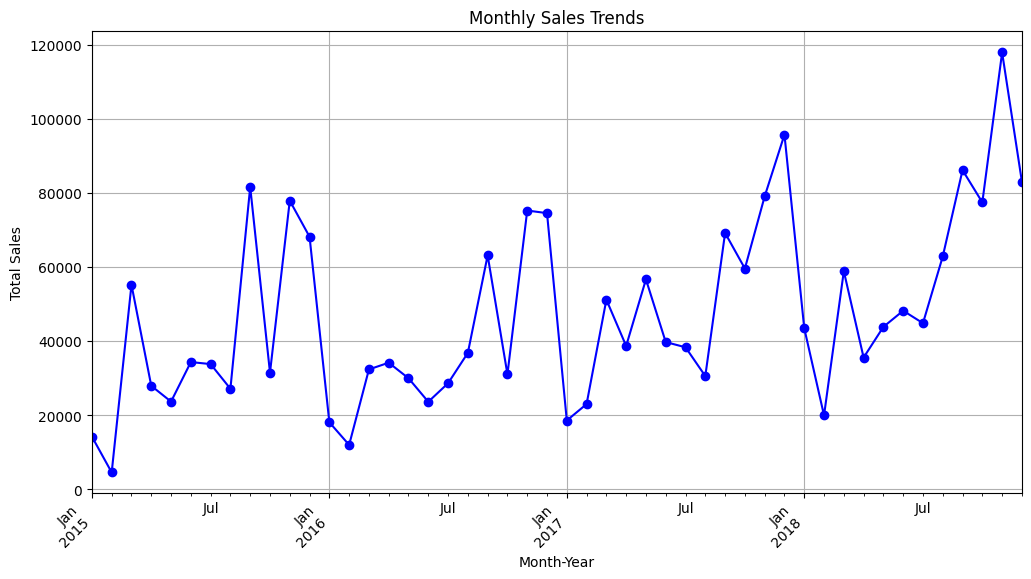

In [31]:
monthly_sales.plot(kind='line', figsize=(12,6),marker='o',color='blue')
plt.title("Monthly Sales Trends")
plt.ylabel("Total Sales")
plt.xlabel("Month-Year")
plt.xticks(rotation=45,ha='right')
plt.grid()
plt.show()

From the above chart, it's clear that the sales reaches it's peak in 2018 between August to December.

In [32]:
regional_sales= df.groupby('Region')['Sales'].sum()
print("Sales by Region:")
print(regional_sales)

Sales by Region:
Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


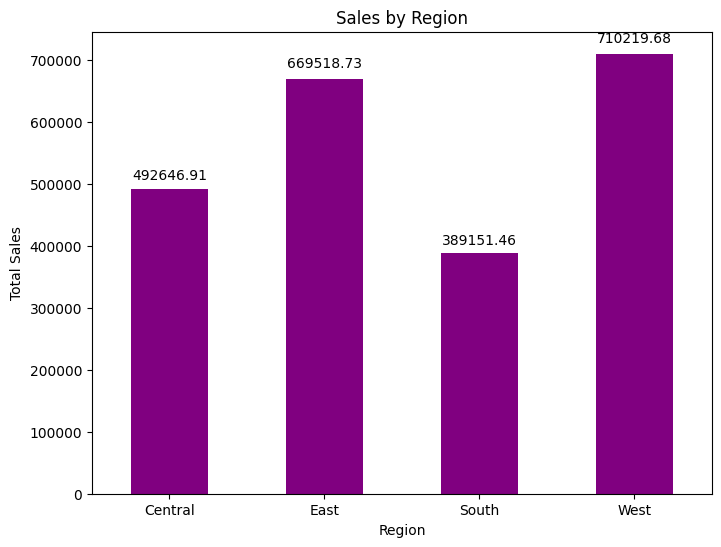

In [33]:
regional_sales.plot(kind='bar', figsize=(8, 6), color='purple')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.xticks(rotation=0)

for index, value in enumerate(regional_sales):
    plt.text(index, value + 0.02 * value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

This graph is howing with respect to the sales happened with respect to each and every region of United states

In [34]:
low_products=top_products.tail(10)
print("Bottom 10 products by Sales:")
print(low_products)

Bottom 10 products by Sales:
Product Name
Stockwell Gold Paper Clips                                          8.096
4009 Highlighters                                                   8.040
Xerox 1989                                                          7.968
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Acme Serrated Blade Letter Opener                                   7.632
Grip Seal Envelopes                                                 7.072
Xerox 20                                                            6.480
Avery 5                                                             5.760
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Name: Sales, dtype: float64


This shows the bottom 10 products with total no of sales of those products

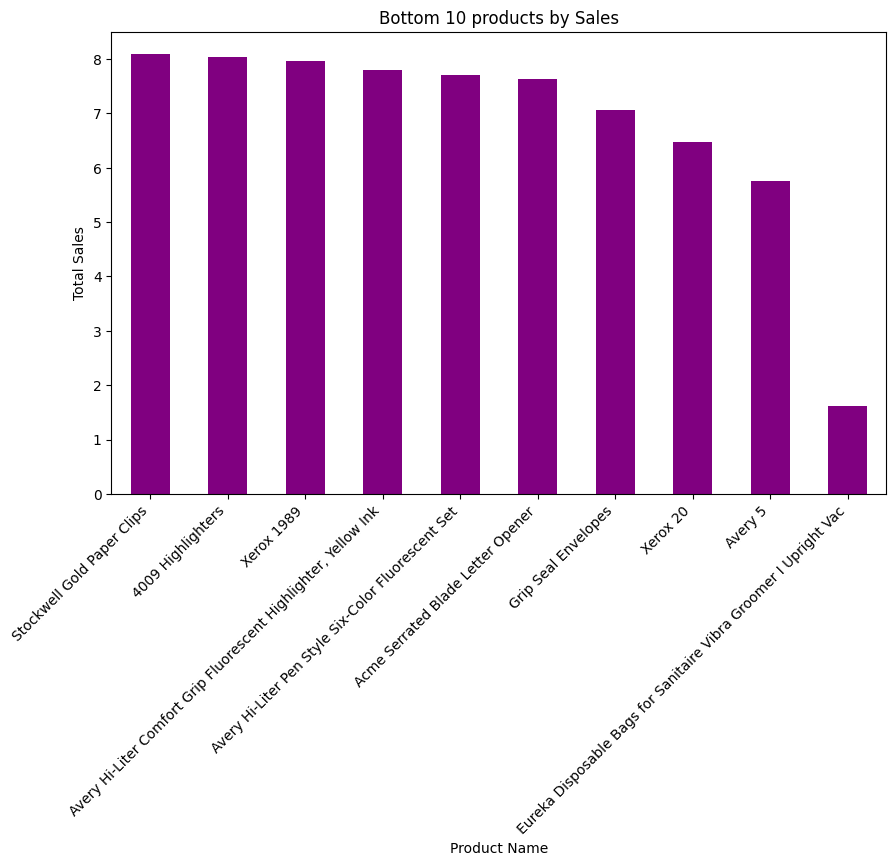

In [35]:
low_products.plot(kind='bar',figsize=(10,6),color='Purple')
plt.title('Bottom 10 products by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.show()

This is the graph demonstrating the bottom 10 products with sales happened of those products

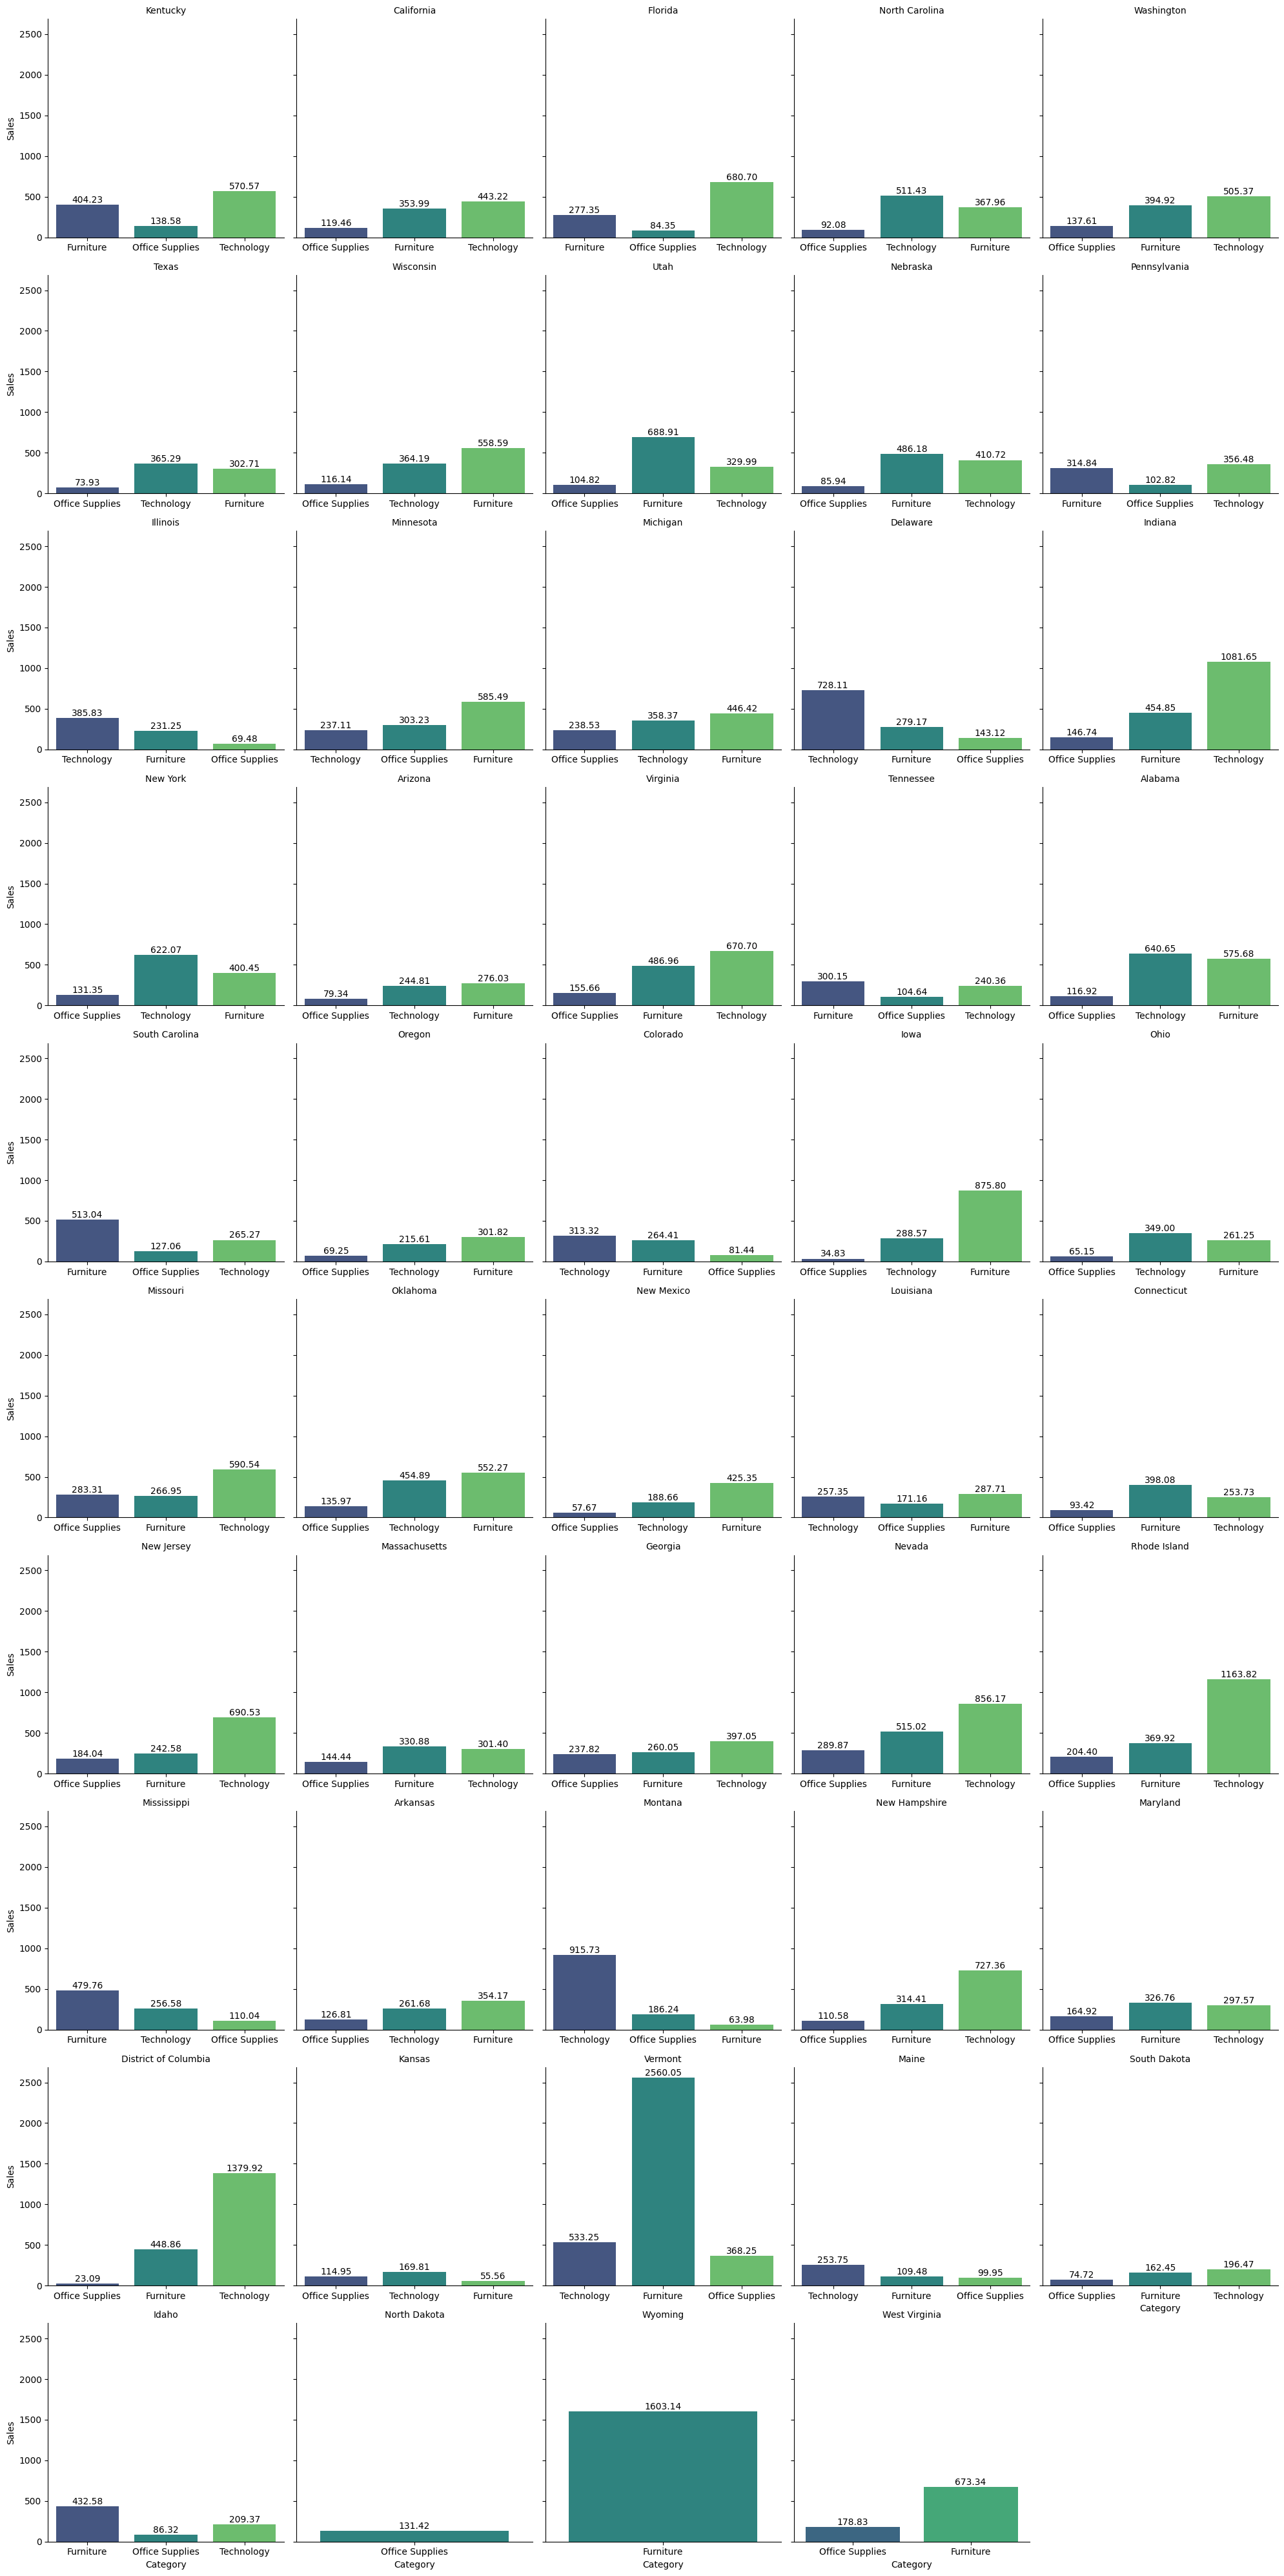

In [36]:
g = sns.FacetGrid(df, col="State", col_wrap=5, height=4, sharex=False, sharey=True)
g.map(sns.barplot, "Category", "Sales", palette="viridis", ci=None)

# Add value labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.05,
                f'{p.get_height():.2f}', ha='center', va='bottom', fontsize=10)

g.set_titles("{col_name}")
g.set_axis_labels("Category", "Sales")
g.tight_layout()
plt.show()

This fecitgrid shows sales with repect to catagories of different states in united states

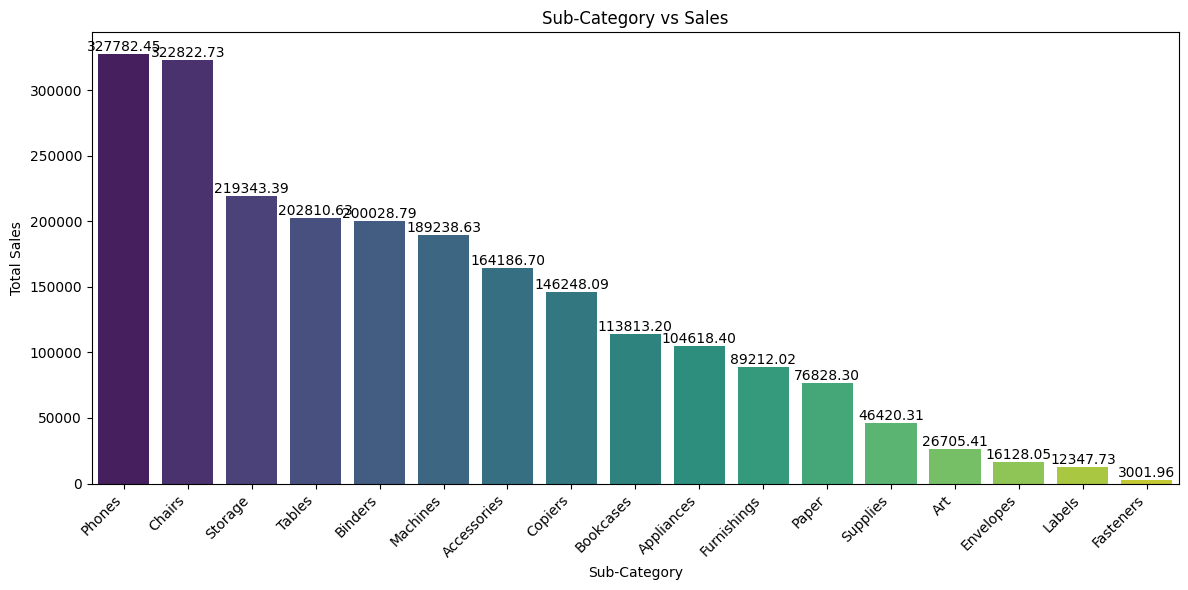

In [37]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sub_category_sales, x='Sub-Category', y='Sales', palette='viridis')

for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.title('Sub-Category vs Sales')
plt.ylabel('Total Sales')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This bar graph shows sales of each and every sub-catagories in the data

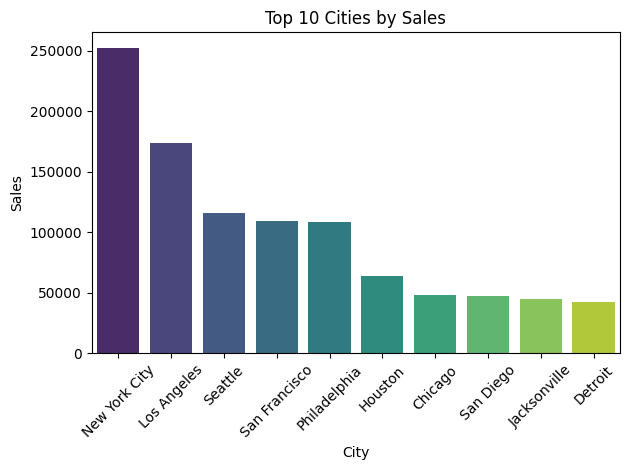

In [38]:
top_cities = df.groupby('City')['Sales'].sum().nlargest(10).reset_index()
sns.barplot(data=top_cities, x='City', y='Sales', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

This bar graph shows top 10 cities with highest sales

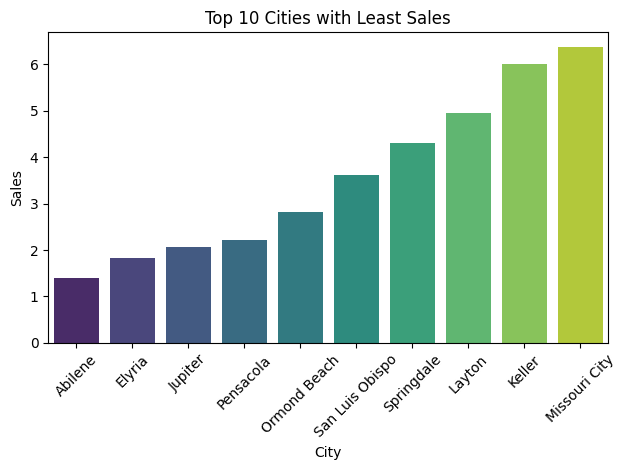

In [39]:
bottom_cities = df.groupby('City')['Sales'].sum().nsmallest(10).reset_index()
sns.barplot(data=bottom_cities, x='City', y='Sales', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Least Sales")
plt.xlabel("City")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

This graph shows the top 10 cities with lowest sales

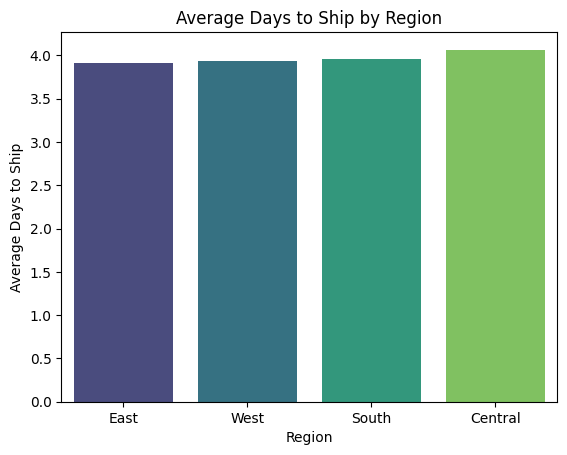

In [40]:
region_shipping = df.groupby('Region')['days_to_ship'].mean().sort_values()
sns.barplot(x=region_shipping.index, y=region_shipping.values, palette='viridis')
plt.title("Average Days to Ship by Region")
plt.xlabel("Region")
plt.ylabel("Average Days to Ship")
plt.show()

This show how many days the product took after ordering to ship in different regions of United States

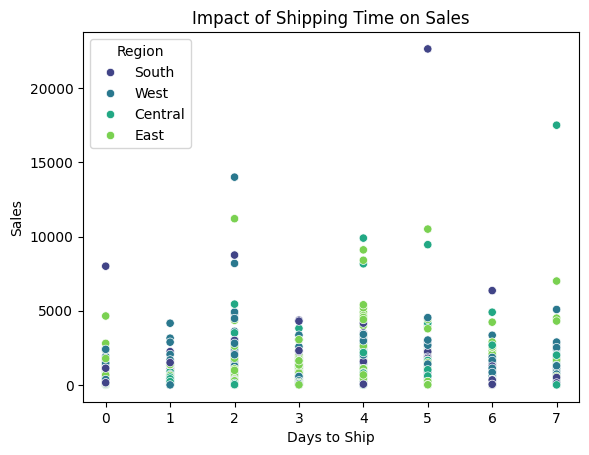

In [41]:
sns.scatterplot(data=df, x='days_to_ship', y='Sales', hue='Region', palette='viridis')
plt.title("Impact of Shipping Time on Sales")
plt.xlabel("Days to Ship")
plt.ylabel("Sales")
plt.show()

This shows the impact of day to ship has on the sales in various regions of United States

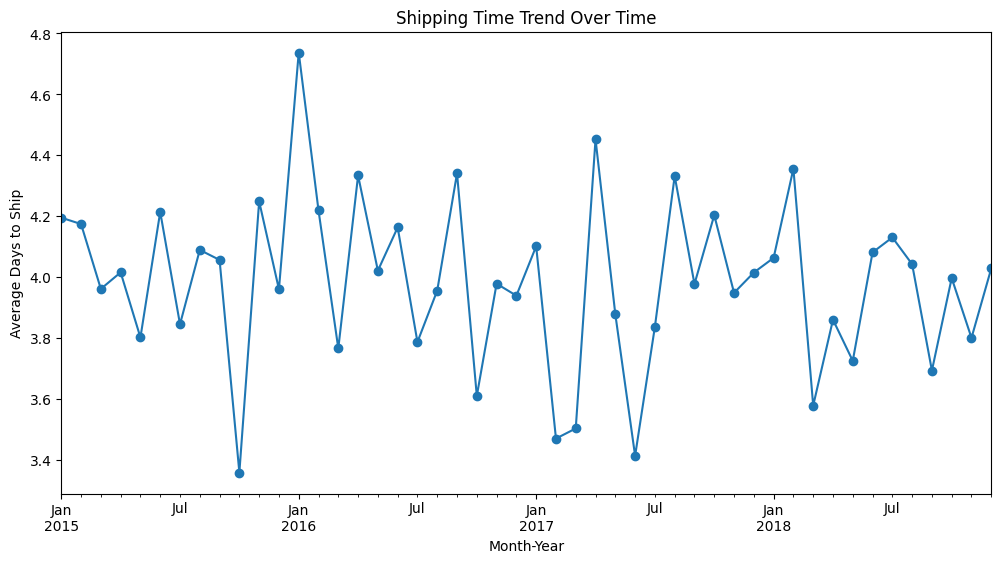

In [42]:
df['Month-Year'] = df['Order Date'].dt.to_period('M')
shipping_trend = df.groupby('Month-Year')['days_to_ship'].mean()
shipping_trend.plot(kind='line', marker='o', figsize=(12, 6), title="Shipping Time Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Average Days to Ship")
plt.show()


This shows that the trend of product to ship after it is ordered over diferent month and year

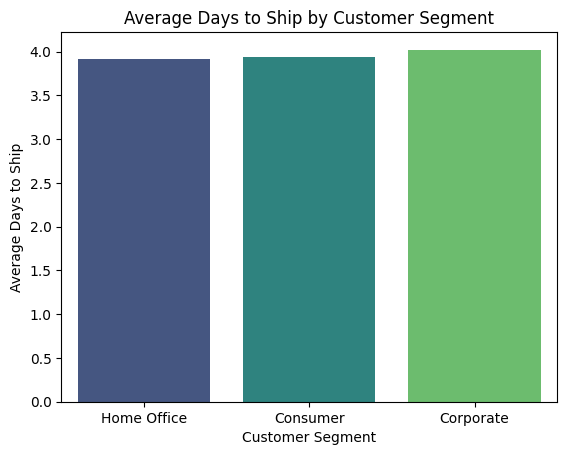

In [43]:
segment_shipping = df.groupby('Segment')['days_to_ship'].mean().sort_values()
sns.barplot(x=segment_shipping.index, y=segment_shipping.values, palette='viridis')
plt.title("Average Days to Ship by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Days to Ship")
plt.show()

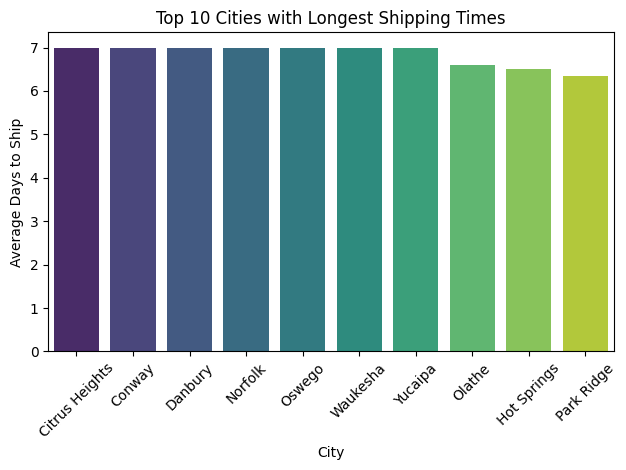

In [44]:
delayed_cities = df.groupby('City')['days_to_ship'].mean().nlargest(10).reset_index()
sns.barplot(data=delayed_cities, x='City', y='days_to_ship', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Longest Shipping Times")
plt.xlabel("City")
plt.ylabel("Average Days to Ship")
plt.tight_layout()
plt.show()


In [45]:
df.to_csv('cleaned_data.csv', index=False)